**LITERATURE SURVEY SUGGESTIONS**

**1. Early Foundations:**
The Mathematics of Statistical Machine Translation" by Warren Weaver (1949) layed the foundation for statistical NLP.

**2. Rule-Based Approaches:**
Speech and Language Processing" by Daniel Jurafsky and James H. Martin (2008)

**3. Statistical and Machine Learning Approaches:**
Foundations of Statistical Natural Language Processing" by Christopher D. Manning and Hinrich Schütze (1999):

**4. Word Embeddings:**
Word2Vec" by Tomas Mikolov et al. (2013)
GloVe: Global Vectors for Word Representation" by Jeffrey Pennington et al. (2014)

**5. Deep Learning Advances:**
Attention Is All You Need" by Ashish Vaswani et al. (2017)
BERT: Bidirectional Encoder Representations from Transformers" by Jacob Devlin et al. (2018)

**6. Sentiment Analysis:**
Sentiment Analysis: Mining Opinions, Sentiments, and Emotions" by Bing Liu (2015):

**7. Named Entity Recognition (NER):**
Named Entity Recognition: A Survey" by R. Nadeau and Satoshi Sekine (2007)

**8. Machine Translation:**
Neural Machine Translation by Jointly Learning to Align and Translate" by Dzmitry Bahdanau et al. (2015)

**9. Question Answering:**
Reading Comprehension with Unsupervised Knowledge Acquisition" by Danqi Chen et al. (2017)

**10. Conversational Agents:**
BERT for Conversational AI" by Yinhan Liu et al. (2019)

**DIFFERENT MODELS THAT CAN BE USED FOR STATEMENT INFERATION**
There are several pre-trained models that can be used for checking statement inference in machine learning.

1. **BERT (Bidirectional Encoder Representations from Transformers):** BERT models, including variants like `bert-base`, `bert-large`, and others, are widely used for NLI tasks. They can be fine-tuned for specific inference tasks.

2. **RoBERTa (A Robustly Optimized BERT Pretraining Approach):** RoBERTa is similar to BERT but uses a different training approach. It has variants like `roberta-base` and `roberta-large` that can be fine-tuned for NLI.

3. **XLNet (Transformer-XL Network):** XLNet is another transformer-based model that can be used for NLI. It's known for its autoregressive and permutation-based training.

4. **ALBERT (A Lite BERT):** ALBERT is designed to be a more memory-efficient and faster variant of BERT. It can also be fine-tuned for NLI tasks.

5. **GPT (Generative Pre-trained Transformer):** While GPT models like `gpt-2` and `gpt-3` are primarily known for generative tasks, they can also be fine-tuned for NLI tasks by providing a prompt with a premise and hypothesis.

6. **DistilBERT:** DistilBERT is a distilled version of BERT, designed to be smaller and faster. It can be used for NLI tasks and is more computationally efficient.


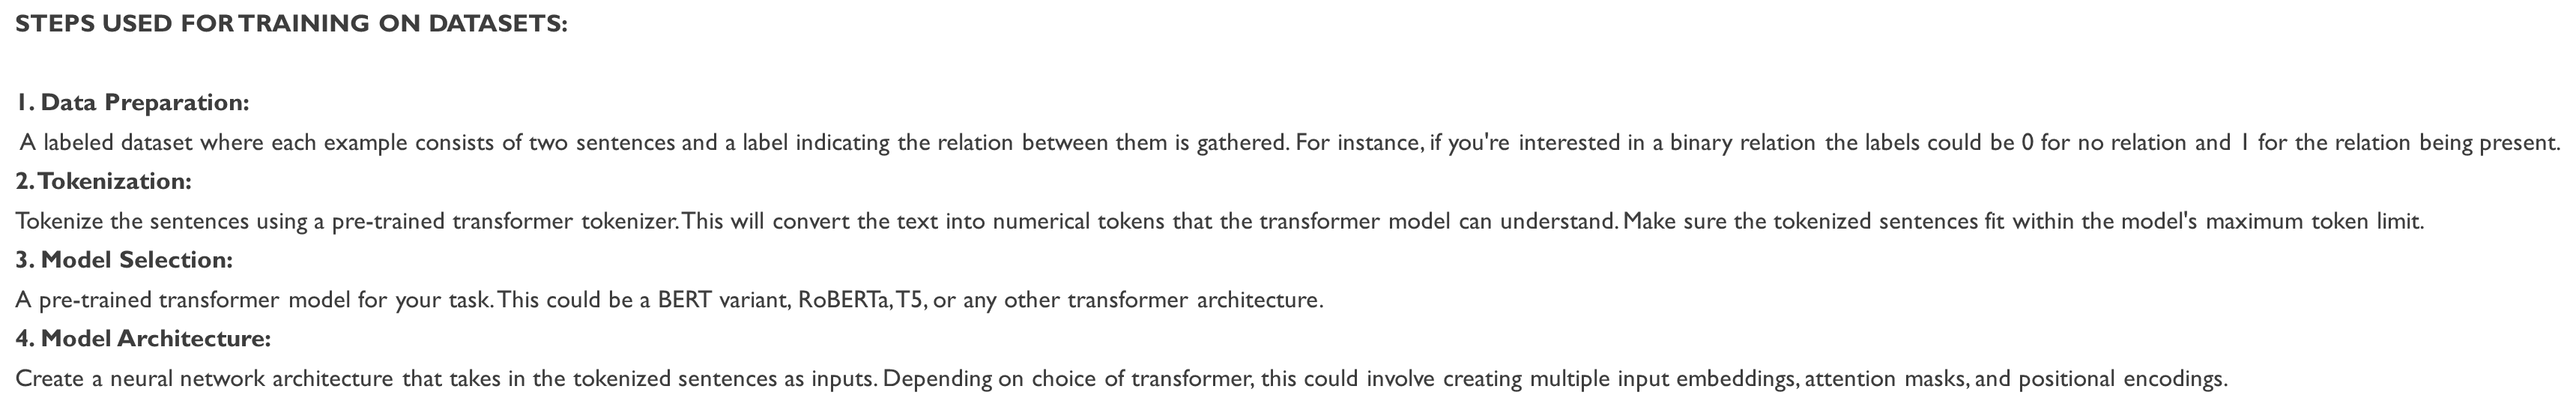

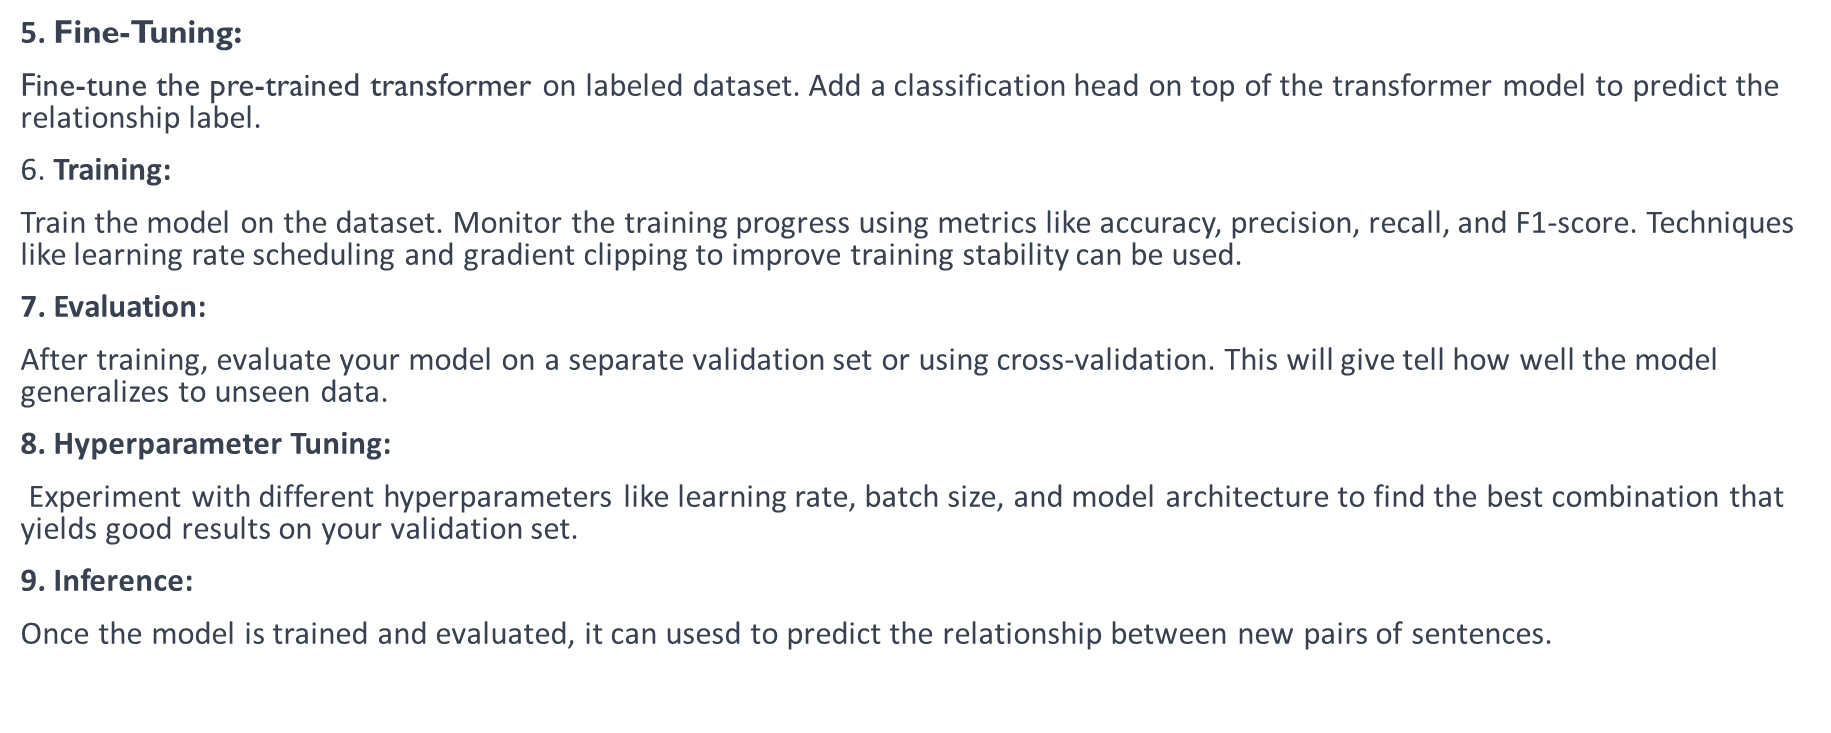

**WHY I CHOSE BERT MODEL?**
BERT (Bidirectional Encoder Representations from Transformers) is a powerful model for various natural language understanding tasks, including data inference.

1. **Bidirectional Contextualization:** BERT is trained in a bidirectional manner, meaning it considers both the left and right context of each word in a sentence. This helps it capture the contextual meaning of words and phrases, making it better at understanding the relationships between different parts of a text.

2. **Pre-training on Large Corpus:** BERT is pre-trained on an enormous amount of text data (e.g., Wikipedia) and learns rich representations of language. This pre-training allows it to capture general language patterns and semantics, which can be fine-tuned for specific tasks like data inference.

3. **Transfer Learning:** BERT's pre-trained model can be fine-tuned on smaller datasets for various downstream tasks, including data inference. This transfer learning ability makes it adaptable to a wide range of NLP applications without needing extensive task-specific labeled data.

4. **Model Architecture:** BERT employs the transformer architecture, which has demonstrated significant improvements in various NLP tasks. Transformers use self-attention mechanisms to capture relationships between words, making them highly effective for understanding language.

5. **Availability and Community Support:** BERT and its variants are readily available through libraries like Hugging Face Transformers, and they have extensive community support. This accessibility makes it easier for developers and researchers to use and experiment with BERT for different tasks.


**USING BERT UNCASED MODEL**

**DATA VISUALIZATION USING SANKEY DIAGRAM**

In [ ]:
import plotly.graph_objects as go
#Link CSV file as columns for premises and hypotheses respectively
premises = ["Premise A", "Premise B", "Premise C", "Premise D"]
hypotheses = ["Hypothesis 1", "Hypothesis 2", "Hypothesis 3", "Hypothesis 4"]

# Define the links between premises and hypotheses
links = [
    {"source": 0, "target": 1, "value": 30},  # Premise A to Hypothesis 2
    {"source": 0, "target": 2, "value": 20},  # Premise A to Hypothesis 3
    {"source": 1, "target": 2, "value": 10},  # Premise B to Hypothesis 3
    {"source": 2, "target": 3, "value": 25},  # Premise C to Hypothesis 4
]

# Create a Sankey diagram figure
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=premises + hypotheses
    ),
    link=dict(
        source=[link["source"] for link in links],
        target=[link["target"] + len(premises) for link in links],
        value=[link["value"] for link in links]
    )
))

# Customize the layout and appearance
fig.update_layout(
    title="Sankey Diagram of Hypotheses and Premises",
    font_size=10
)

# Show the interactive plot
fig.show()


**SCORES AND ANALYSIS**

In [ ]:
import nltk
import numpy as np

def tf_idf(sentences):
  """
  Calculates the TF-IDF score for each word in each sentence.

  Args:
    sentences: A list of sentences.

  Returns:
    A dictionary of word to TF-IDF scores.
  """
  word_counts = {}
  for sentence in sentences:
    for word in sentence.split():
      if word not in word_counts:
        word_counts[word] = 0
      word_counts[word] += 1

  idf_values = {}
  num_documents = len(sentences)
  for word, count in word_counts.items():
    idf_values[word] = np.log(num_documents / count)

  tf_idf_scores = {}
  for sentence in sentences:
    tf_idf_scores[sentence] = {}
    for word in sentence.split():
      tf_idf_scores[sentence][word] = word_counts[word] * idf_values[word]

  return tf_idf_scores

def predict_answer(question, sentences, tf_idf_scores):
  """
  Predicts whether a sentence is the answer to a question.

  Args:
    question: A sentence.
    sentences: A list of sentences.
    tf_idf_scores: A dictionary of word to TF-IDF scores.

  Returns:
    A list of sentences that are the most likely answers to the question.
  """

  scores = []
  for sentence in sentences:
    score = 0
    for word in question.split():
      if word in tf_idf_scores[sentence]:
        score += tf_idf_scores[sentence][word]
    scores.append(score)

  best_sentences = []
  max_score = max(scores)
  for i, score in enumerate(scores):
    if score == max_score:
      best_sentences.append(sentences[i])

  return best_sentences

def main():
  question = "What is the capital of France?"
  sentences = ["Paris is the capital of France.", "London is the capital of England.", "Tokyo is the capital of Japan."]
  tf_idf_scores = tf_idf(sentences)

  best_sentences = predict_answer(question, sentences, tf_idf_scores)
  print(best_sentences)

if __name__ == "__main__":
  main()


**IMPORTANT IMPORTS**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.1 MB/s eta 0:00:00


In [ ]:
!pip install cloud-tpu-client==0.10 torch==2.0.0 torchvision==0.15.1 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-2.0-cp310-cp310-linux_x86_64.whl

In [ ]:
!pip install torchvision

In [ ]:
!pip install scipy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir= '/content/drive/MyDrive/NewFolder'

Mounted at /content/drive


In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

def check_inference(premise, hypothesis, model, tokenizer):
    # Encode premise and hypothesis
    encoded_dict = tokenizer.encode_plus(
        premise, hypothesis,
        max_length=128,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )

    # Inference
    with torch.no_grad():
        outputs = model(**encoded_dict)
        logits = outputs.logits
        probabilities = softmax(logits, dim=1).tolist()[0]

    # The index 1 corresponds to "entailment" class
    entailment_prob = probabilities[1]

    return entailment_prob

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Load the CSV file into a DataFrame
path="/content/drive/MyDrive/dataset/cgptsamples-1.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(path)

# Choose the columns containing the premise and hypothesis
premise_column = 'statement'  # Replace with the actual column name
hypothesis_column = 'reason'  # Replace with the actual column name

# Perform NLI on each pair of statements in the DataFrame
for index, row in df.iterrows():
    premise = row[premise_column]
    hypothesis = row[hypothesis_column]

    inference_prob = check_inference(premise, hypothesis, model, tokenizer)

    if inference_prob > 0.5:
        print(f"Row {index + 1}: The hypothesis can be inferred from the premise.")
    else:
        print(f"Row {index + 1}: The hypothesis cannot be inferred from the premise.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: ignored

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw

**GENERATING AUGUMENTED TEXT DATASET**

In [ ]:


text = "The quick brown fox jumps over the lazy dog."

# Create a synonym replacement augmenter
aug = naw.SynonymAug(aug_src='wordnet')

# Augment the text
augmented_text = aug.augment(text)

print("Original Text:", text)
print("Augmented Text:", augmented_text)
#Linking CSV file to generate the augumented test dat sets.


Original Text: The quick brown fox jumps over the lazy dog.
Augmented Text: ['The quick brown slyboots start over the work shy dog.']


In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw

# Load the CSV dataset
dataset_path = '/cgptsamples-1.csv'
df = pd.read_csv(dataset_path)

# Initialize a synonym replacement augmenter
aug = naw.SynonymAug(aug_src='wordnet')

# Perform synonym replacement on each row in the 'text' column
augmented_texts = []
for text in df['statement']:
    augmented_text = aug.augment(text)
    augmented_texts.append(augmented_text)

# Create a new column 'augmented_text' in the DataFrame
df['augmented_text'] = augmented_texts

# Save the augmented DataFrame to a new CSV file
augmented_dataset_path = 'augmented_dataset.csv'
df.to_csv(augmented_dataset_path, index=False)

print("Augmented dataset saved to:", augmented_dataset_path)

import pandas as pd

# Replace 'data.csv' with the actual path to your CSV file
csv_file_path = '/content/augmented_dataset.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the contents of the DataFrame
print(df)


**NEGATIVE SAMPLING:**

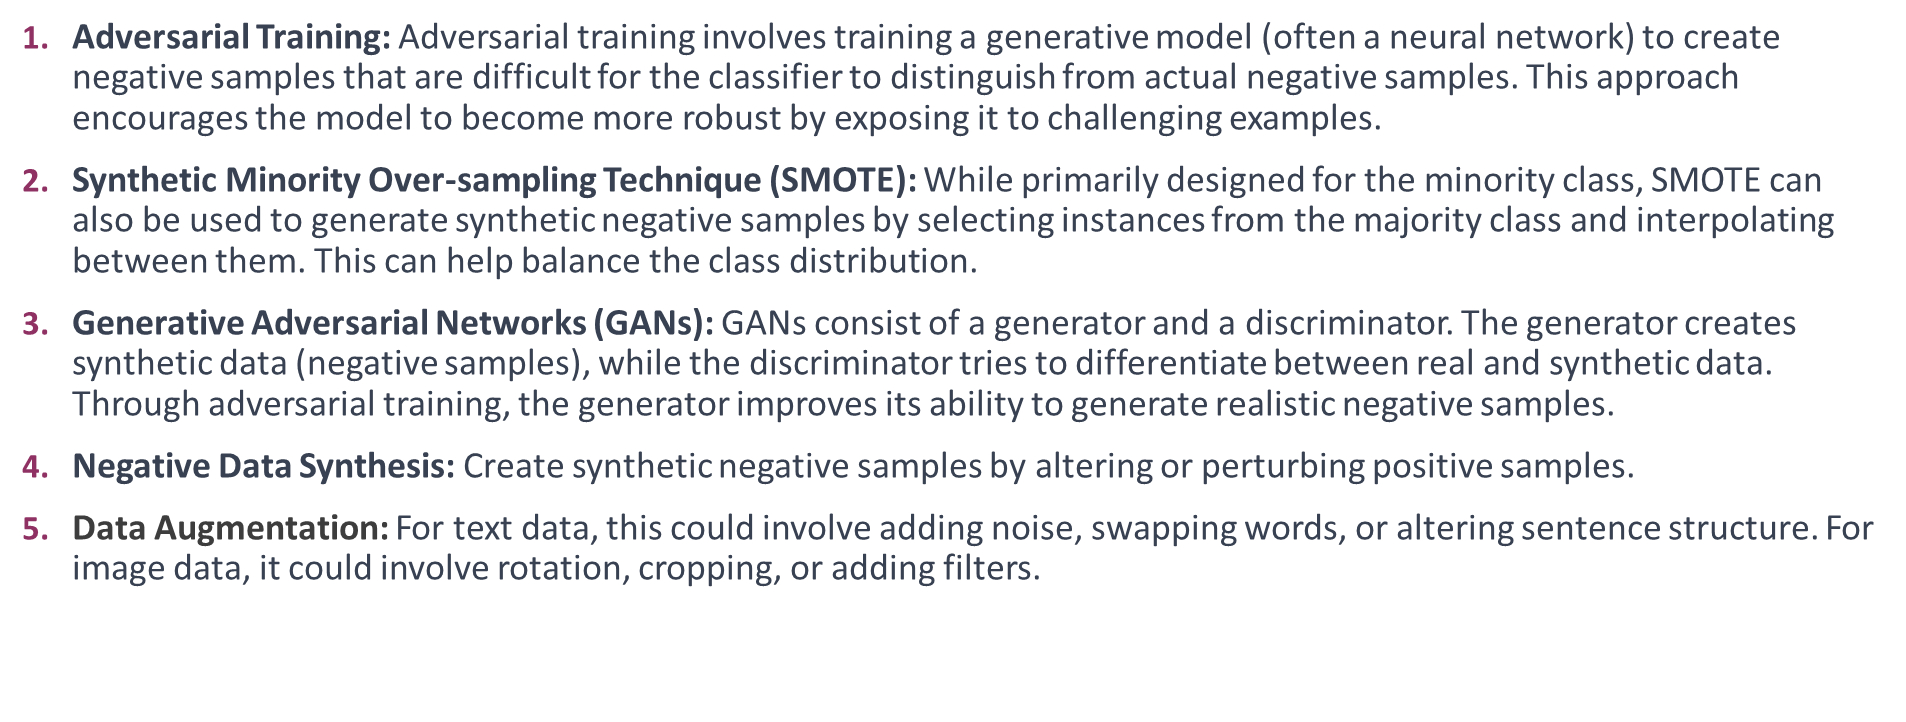

**USING ANOTHER MODEL OTHER BERT UNCASED**

Using ROBERTA

---



In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.nn.functional import softmax

def check_inference(premise, hypothesis, model, tokenizer):
    # Encode premise and hypothesis
    encoded_dict = tokenizer.encode_plus(
        premise, hypothesis,
        max_length=128,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )

    # Inference
    with torch.no_grad():
        outputs = model(**encoded_dict)
        logits = outputs.logits
        probabilities = softmax(logits, dim=1).tolist()[0]

    # The index 1 corresponds to "entailment" class
    entailment_prob = probabilities[1]

    return entailment_prob

# Load pre-trained RoBERTa model and tokenizer
model_name = 'roberta-large'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Example statements
premise = "The cat is sitting on the mat."
hypothesis = "The cat is on the mat."
inference_prob = check_inference(premise, hypothesis, model, tokenizer)

if inference_prob > 0.5:
    print("The hypothesis can be inferred from the premise.")
else:
    print("The hypothesis cannot be inferred from the premise.")


ModuleNotFoundError: ignored